# MEMO
- Motivación del trabajo y porqué lo quería hacer y como he llegado a él
- Problemática encontrada al principio del trabajo
- Acciones tomadas para el trabajo:
    - Scrapping problemático
    - construcción de dataframe a partir de 2. Problemas
    - Obtener la data final
    - Hacer los análisis + plot


1. Pregunta potente: ¿no os habéis preguntado nunca como y quien ha hecho o hace las estadisticas del fifa?
    En esto os hago un spoiler, la empresa encrgada es opta y una serie de scoutings que tienen repartidos a lo largo del mundo. 
2. Primer análisis Fifa
    - 
3. Análisis comparativa Messi/Cristiano & Mbappe/Halland
4. Análisis fifa-goles


En primer lugar haremos un breve resumen de cómo hemos llegado 

# Cargar librerías , archivos y limpieza columnas

In [244]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display,HTML

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",None)

In [143]:
df_fifa = pd.read_csv("./data/players_22.csv")
df_reales = pd.read_csv("./data/datos_reales_15_10_2024_id.csv")

## Tratar los datos y columnas

In [144]:
# Cambiar nombre id
df_fifa.rename(columns={"sofifa_id":"id_j"},inplace=True)
df_reales.rename(columns={"match_id":"id_j"},inplace=True)

In [145]:
# eliminar columnas que sobran
df_fifa.drop(["player_url"],inplace=True,axis=1)
df_reales.drop(["Unnamed: 0"],inplace=True,axis=1)

In [147]:
df_fifa = df_fifa[df_fifa["league_name"].isin(["Italian Serie A", "French Ligue 1","English Premier League","Spain Primera Division","German 1. Bundesliga"])]

In [6]:
cols = []
for i in df_fifa.columns:
    cols.append(i)

In [7]:
for i in cols:
    print(i)

id_j
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_compos

In [8]:
df_fifa.isnull().sum()

id_j                              0
short_name                        0
long_name                         0
player_positions                  0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
club_team_id                      0
club_name                         0
league_name                       0
league_level                      0
club_position                     0
club_jersey_number                0
club_loaned_from               2722
club_joined                     206
club_contract_valid_until         0
nationality_id                    0
nationality_name                  0
nation_team_id                 2604
nation_position                2604
nation_jersey_number           2604
preferred_foot                    0
weak_foot                   

In [9]:
# INPUTE NAN VALUES with mean
fill_values = df_fifa.loc[:,["pace","shooting","passing","dribbling","defending","physic"]]

for i in fill_values:
    df_fifa[i].fillna(df_fifa[i].mean(),inplace=True)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_3004\3975976272.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fifa[i].fillna(df_fifa[i].mean(),inplace=True)


In [202]:
df_fifa.isnull().sum()


id_j                              0
short_name                        0
long_name                         0
player_positions                  0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
club_team_id                      0
club_name                         0
league_name                       0
league_level                      0
club_position                     0
club_jersey_number                0
club_loaned_from               2763
club_joined                     213
club_contract_valid_until         0
nationality_id                    0
nationality_name                  0
nation_team_id                 2627
nation_position                2627
nation_jersey_number           2627
preferred_foot                    0
weak_foot                   

# 1 ANALISIS EXPLORATORIO DATASET FIFA

## H1 Análisis altura de todos los jugadores

Text(0, 0.5, '')

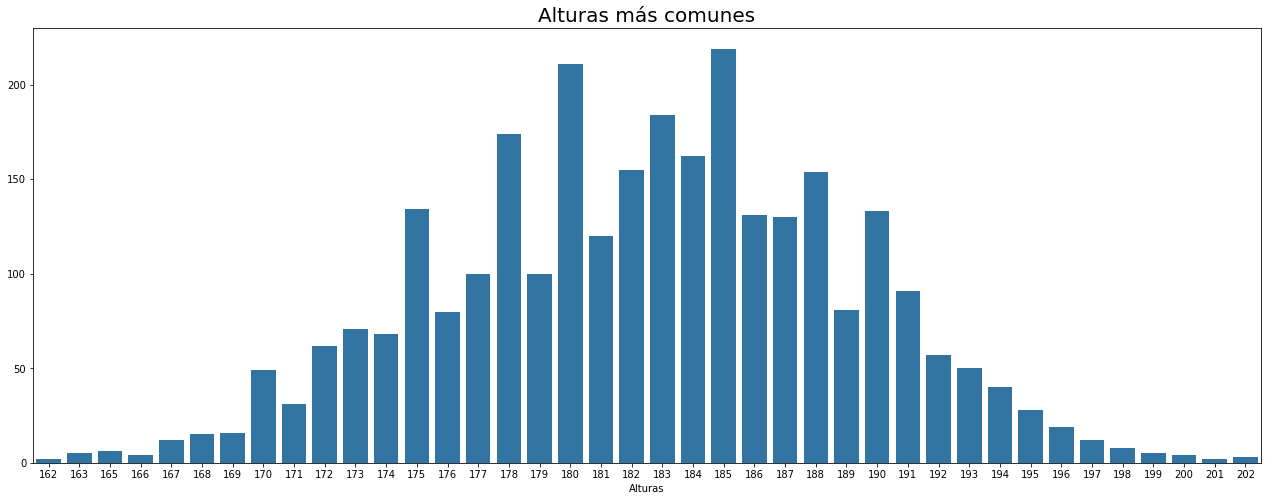

In [11]:
plt.figure(figsize=(22,8))
ax = sns.countplot(x = "height_cm",data=df_fifa)
ax.set_title("Alturas más comunes", fontsize=20)
ax.set_xlabel("Alturas")
ax.set_ylabel("")

## H2 alturas mas comunes?

In [12]:
h2 = df_fifa[["short_name","dribbling","height_cm"]]
h2.head()

,short_name,dribbling,height_cm
55,J. Hector,75.000000,185
56,E. Skhiri,73.000000,185
57,T. Horn,67.774847,192
58,F. Kainz,77.000000,176
59,M. Uth,76.000000,185


## RELACION ENTRE ALTURA Y DRIBLING

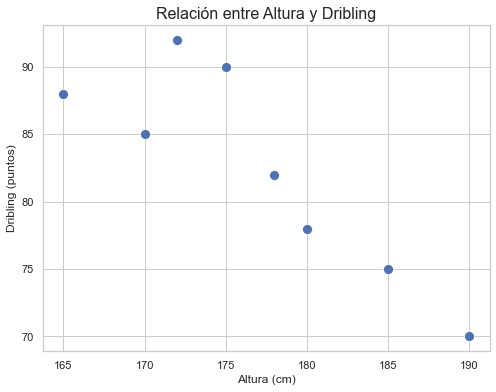

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'Altura': [170, 180, 175, 165, 190, 185, 178, 172],
    'Dribling': [85, 78, 90, 88, 70, 75, 82, 92]
}

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Altura', y='Dribling', data=data, s=100, color="b", marker="o")

# Agregar títulos y etiquetas
plt.title("Relación entre Altura y Dribling", fontsize=16)
plt.xlabel("Altura (cm)", fontsize=12)
plt.ylabel("Dribling (puntos)", fontsize=12)

# Mostrar el gráfico
plt.show()

<Figure size 1584x576 with 0 Axes>

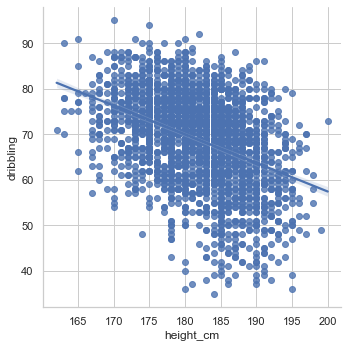

In [333]:
# está relacionada la altura con el dribbling?
plt.figure(figsize=(22,8))
# sns.scatterplot(x="height_cm",y="dribbling",data=df_fifa)
sns.lmplot(x="height_cm",y="dribbling",data=df_fifa)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_3004\806998170.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




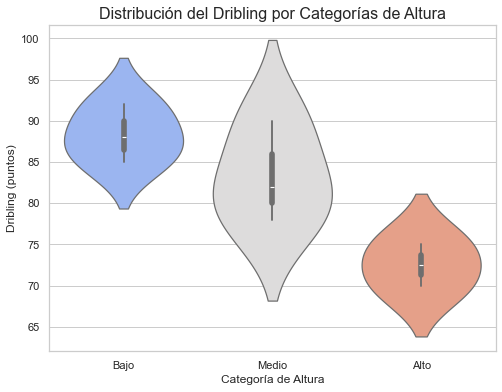

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear dataframe con categorías de altura
data = pd.DataFrame({
    'Altura': ['Bajo', 'Medio', 'Medio', 'Bajo', 'Alto', 'Alto', 'Medio', 'Bajo'],
    'Dribling': [85, 78, 90, 88, 70, 75, 82, 92]
})

# Crear el violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Altura', y='Dribling', data=data, palette="coolwarm")

# Agregar títulos y etiquetas
plt.title("Distribución del Dribling por Categorías de Altura", fontsize=16)
plt.xlabel("Categoría de Altura", fontsize=12)
plt.ylabel("Dribling (puntos)", fontsize=12)

# Mostrar el gráfico
plt.show()


## H3 Top 10 jugadores según sus medias

In [276]:
df_fifa.sort_values('overall', ascending=False)[['short_name', 'overall']][:10]

,short_name,overall
12800,L. Messi,93
6593,R. Lewandowski,92
11197,K. De Bruyne,91
12802,K. Mbappé,91
11229,Cristiano Ronaldo,91
12801,Neymar Jr,91
1890,J. Oblak,91
6532,M. ter Stegen,90
17203,H. Kane,90
3714,N. Kanté,90


## H4 Top 5 paises con los jugadores con más medias

In [284]:
h4 = df_fifa.groupby(['nationality_name'])['overall'].max().sort_values(ascending = False).head(10)
h4

nationality_name
Argentina         93
Poland            92
Belgium           91
France            91
Brazil            91
Portugal          91
Slovenia          91
Germany           90
England           90
Korea Republic    89
Name: overall, dtype: int64

## H5 Top 10 clubes con los jugadores con más medias

In [303]:
h5 = df_fifa.groupby(['club_name'])['overall'].max().sort_values(ascending = False)
h5 = h5.head(10)

h5

club_name
Paris Saint-Germain    93
FC Bayern München      92
Manchester United      91
Manchester City        91
Atlético de Madrid     91
Tottenham Hotspur      90
FC Barcelona           90
Chelsea                90
Liverpool              89
Real Madrid CF         89
Name: overall, dtype: int64

## H6 Distribución de la edad de los jugadores en los equipos 

C:\Users\Francisco\AppData\Local\Temp\ipykernel_3004\2503094226.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




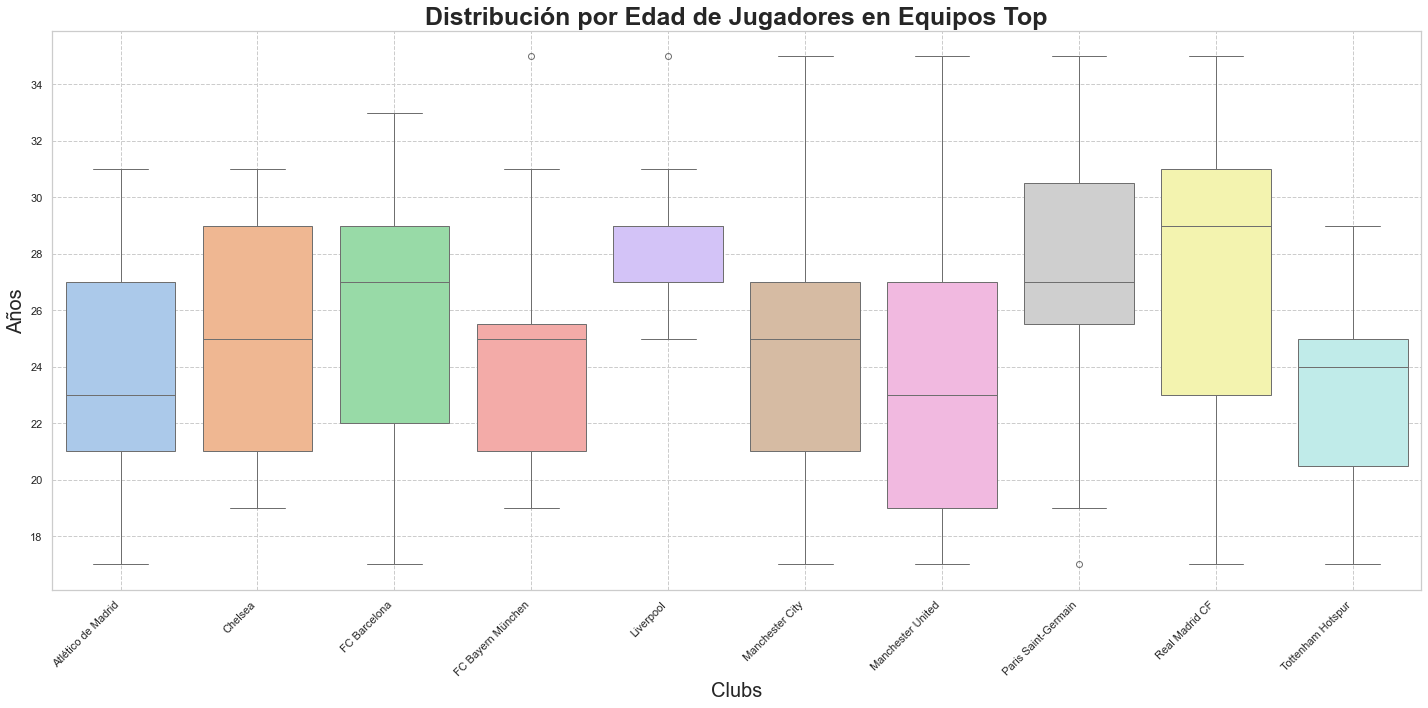

In [315]:
h6 = h5.index.to_list()
clubs = df_fifa.loc[df_fifa['club_name'].isin(h6) & df_fifa['age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.set(style="whitegrid")
ax = sns.boxplot(x="club_name", y="age", data=clubs, palette="pastel")
ax.set_title(label='Distribución por Edad de Jugadores en Equipos Top', fontsize=25, fontweight='bold')
plt.xlabel('Clubs', fontsize=20)
plt.ylabel('Años', fontsize=20)
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(visible=True, linestyle='--')
plt.tight_layout()
plt.show()


## H7 Clubes más importantes

In [330]:
club_media_overall = df_fifa.groupby("club_name")["overall"].mean().reset_index()
club_media_overall.columns = ["club_name", "media_overall"]
club_media_overall = club_media_overall.sort_values(by="media_overall", ascending=False)

top_clubs = club_media_overall.head(10)
top_clubs

data_clubs = df_fifa.loc[df_fifa['club_name'].isin(top_clubs.club_name) & df_fifa['overall']] 
data_clubs.head()


,id_j,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
1735,215333,D. Zapata,Duván Esteban Zapata Banguera,ST,83,83,35500000.0,77000.0,30,1991-04-01,189,88,39.0,Atalanta,Italian Serie A,1.0,ST,91.0,NaN,2020-01-17,2023.0,56,Colombia,NaN,NaN,NaN,Right,4,3,2,High/Medium,Normal (185+),Yes,60400000.0,#Strength,Power Header,80.0,81.0,61.0,78.0,35.0,84.0,44,88,83,74,79,79,55,62,47,82,78,81,67,82,58,86,80,75,93,64,72,20,86,66,70,82,44,24,22,9,9,8,6,8,NaN,83,83,83,76,80,80,80,76,76+2,76+2,76+2,74+2,67+2,67+2,67+2,74+2,54+2,54+2,54+2,54+2,54+2,52+2,53+2,53+2,53+2,52+2,16+2,https://cdn.sofifa.net/players/215/333/22_120.png,https://cdn.sofifa.net/teams/39/60.png,https://cdn.sofifa.net/flags/it.png,NaN,https://cdn.sofifa.net/flags/co.png
1736,223697,R. Gosens,Robin Everardus Gosens,"LWB, LB, LM",83,83,36000000.0,65000.0,26,1994-07-05,183,76,39.0,Atalanta,Italian Serie A,1.0,LM,8.0,NaN,2017-07-01,2023.0,21,Germany,1337.0,SUB,20.0,Left,3,3,3,High/Medium,Normal (170-185),No,61200000.0,NaN,"Early Crosser, Long Shot Taker (AI)",82.0,75.0,74.0,79.0,77.0,81.0,82,79,82,80,71,80,69,58,77,82,79,84,71,86,66,76,88,89,76,68,80,77,86,60,50,77,75,78,79,7,16,15,16,10,NaN,81+2,81+2,81+2,80,79,79,79,80,77+3,77+3,77+3,80+3,78+3,78+3,78+3,80+3,81+2,79+3,79+3,79+3,81+2,81+2,79+3,79+3,79+3,81+2,21+3,https://cdn.sofifa.net/players/223/697/22_120.png,https://cdn.sofifa.net/teams/39/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
1739,214979,J. Musso,Juan Agustín Musso,GK,81,83,23500000.0,44000.0,27,1994-05-06,191,93,39.0,Atalanta,Italian Serie A,1.0,GK,1.0,NaN,2021-07-02,2025.0,52,Argentina,1369.0,SUB,12.0,Right,3,1,1,Medium/Medium,Normal (185+),No,41700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,18,15,31,15,16,16,12,24,20,46,42,32,71,39,55,51,35,70,14,27,18,19,48,25,67,12,14,16,82,78,73,82,86,44.0,31+2,31+2,31+2,29,31,31,31,29,30+2,30+2,30+2,30+2,30+2,30+2,30+2,30+2,27+2,28+2,28+2,28+2,27+2,27+2,27+2,27+2,27+2,27+2,80+2,https://cdn.sofifa.net/players/214/979/22_120.png,https://cdn.sofifa.net/teams/39/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1740,220093,H. Hateboer,Hans Hateboer,"RWB, RB, RM",81,81,25000000.0,55000.0,27,1994-01-09,185,72,39.0,Atalanta,Italian Serie A,1.0,RES,33.0,NaN,2017-01-31,2023.0,34,Netherlands,NaN,NaN,NaN,Right,3,3,3,High/Medium,Normal (185+),No,42500000.0,NaN,"Long Throw-in, Speed Dribbler (AI)",84.0,64.0,72.0,77.0,77.0,79.0,82,64,76,78,58,79,50,30,70,78,80,87,68,79,74,72,74,86,75,58,79,74,84,69,47,77,77,78,77,11,6,8,14,15,NaN,75+3,75+3,75+3,77,76,76,76,77,75+3,75+3,75+3,78+3,76+3,76+3,76+3,78+3,79+

## H7 Distribución de la media en los clubes más populares

C:\Users\Francisco\AppData\Local\Temp\ipykernel_3004\2255930374.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




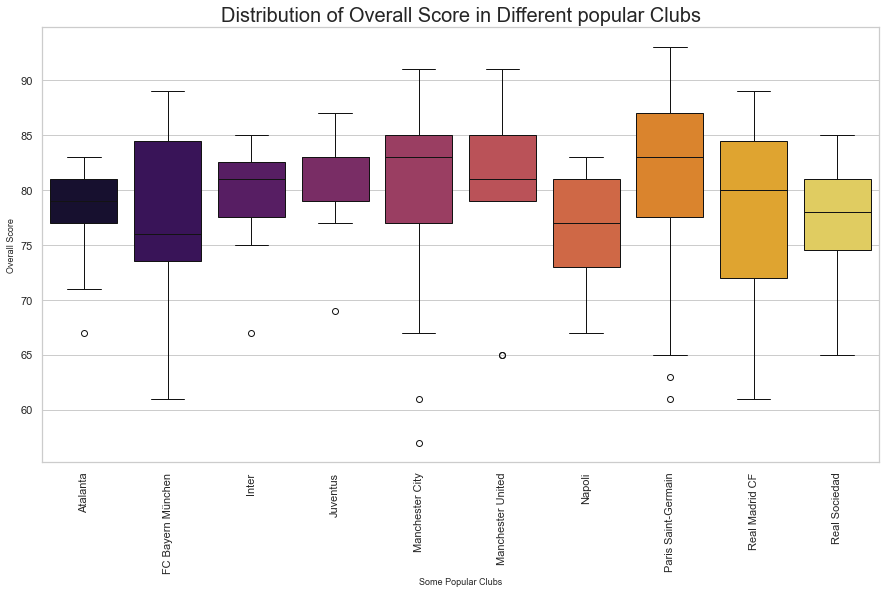

In [331]:
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['club_name'], y = data_clubs['overall'], palette = 'inferno') # creating a boxplot
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

# 2 COMPARACIÓN JUGADORES

In [201]:
# Generales
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic']

In [198]:
# Skills totales
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

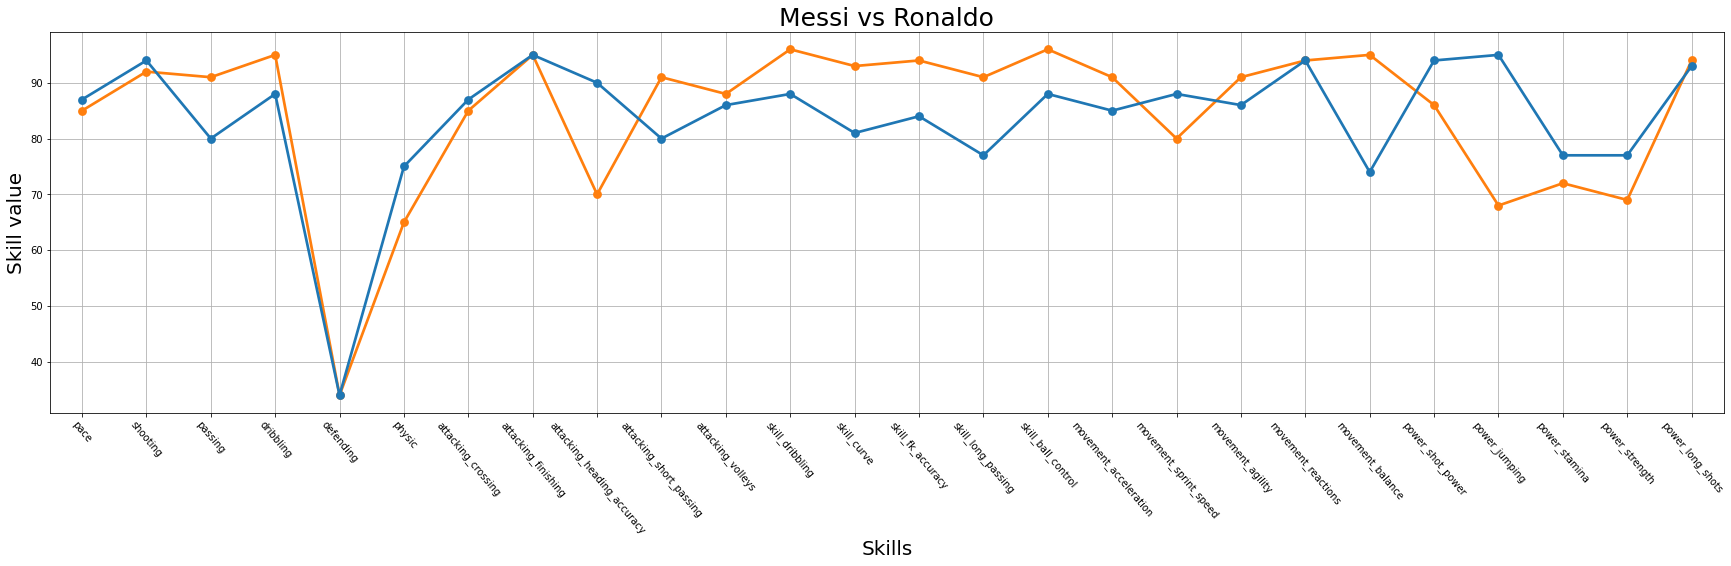

In [169]:
messi = df_fifa.loc[df_fifa['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = df_fifa.loc[df_fifa['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)

plt.figure(figsize=(30,7))
sns.pointplot(data=messi,color='#ff7f0e')
sns.pointplot(data=ronaldo, color='#1f77b4')
plt.xticks(rotation=-50)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Messi vs Ronaldo', fontsize = 25)
plt.grid()

## MBAPPE/HALLAND

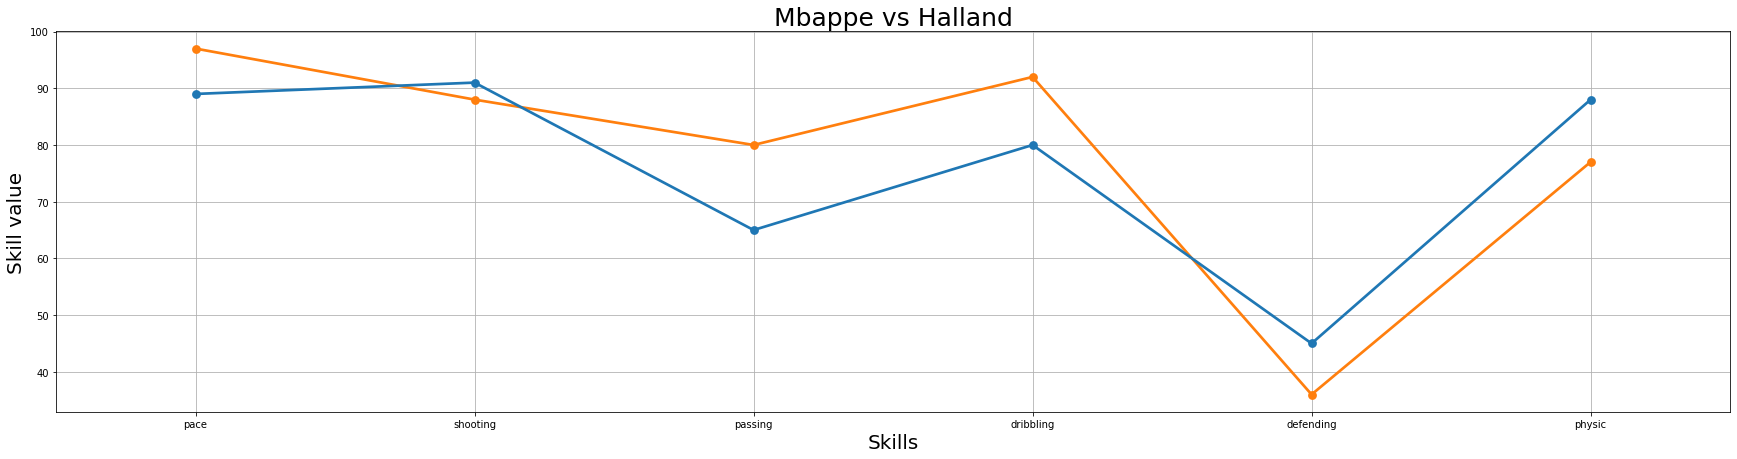

In [204]:
mbappe = df_fifa.loc[df_fifa['short_name'] == 'K. Mbappé']
mbappe = pd.DataFrame(mbappe, columns = skills)
halland = df_fifa.loc[df_fifa['short_name'] == 'E. Haaland']
halland = pd.DataFrame(halland, columns = skills)

plt.figure(figsize=(30,7))
sns.pointplot(data=mbappe,color='#ff7f0e')
sns.pointplot(data=halland, color='#1f77b4')
plt.xticks()
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Mbappe vs Halland', fontsize = 25)
plt.grid()

## MESSI/CRISTIANO/MBAPPE/HALLAND

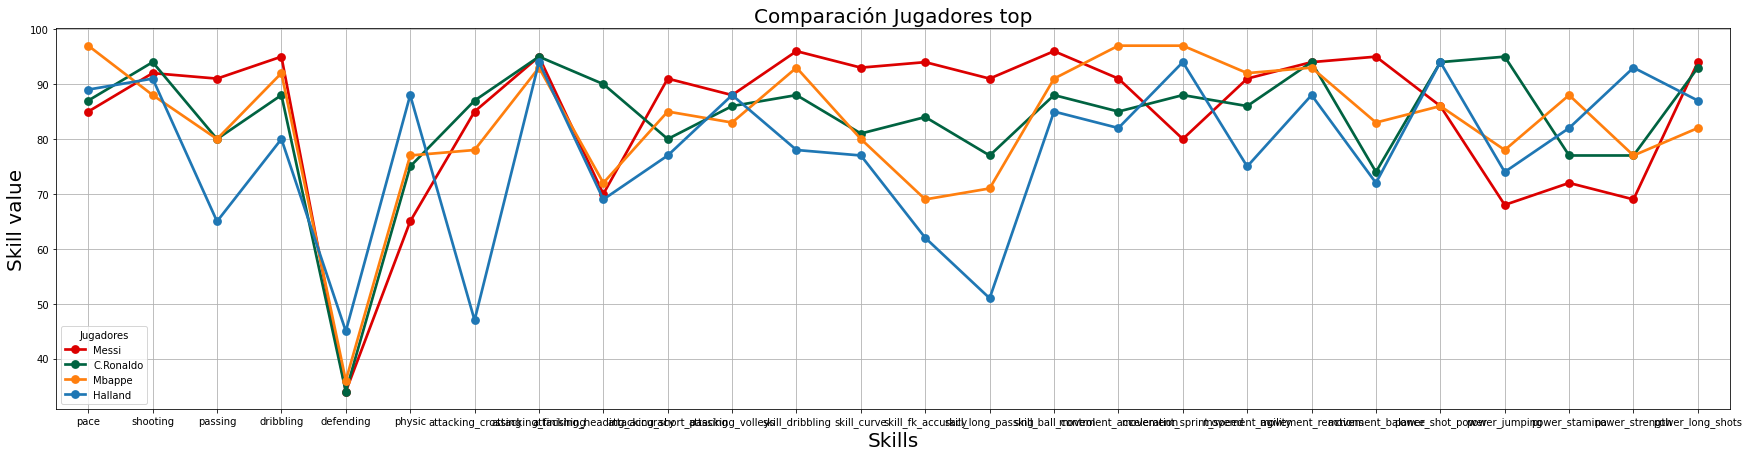

In [199]:
messi = df_fifa.loc[df_fifa['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = df_fifa.loc[df_fifa['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)
mbappe = df_fifa.loc[df_fifa['short_name'] == 'K. Mbappé']
mbappe = pd.DataFrame(mbappe, columns = skills)
halland = df_fifa.loc[df_fifa['short_name'] == 'E. Haaland']
halland = pd.DataFrame(halland, columns = skills)




plt.figure(figsize=(30,7))
sns.pointplot(data=messi,color='#dc0000', label="Messi")
sns.pointplot(data=ronaldo, color='#006341', label="C.Ronaldo")
sns.pointplot(data=mbappe,color='#ff7f0e', label="Mbappe")
sns.pointplot(data=halland, color='#1f77b4', label="Halland")

plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Comparación Jugadores top', fontsize = 20)
plt.legend(title="Jugadores")

plt.grid()

------------------------------------------------------------------------------------------------------------------------

# 3 ANALISIS CON DATOS REALES

## H1 Top 10 jugadores con mas goles en 2022


In [235]:
h1 = df_fifa[["id_j","short_name"]]
h1 = pd.merge(h1, df_reales[["id_j","goles"]],how="inner", on="id_j",) # !!!
h1.head()

,id_j,short_name,goles
0,207562,S. Andersson,2
1,41236,Z. Ibrahimović,8
2,232656,T. Hernández,5
3,232656,T. Hernández,1
4,210413,A. Romagnoli,2


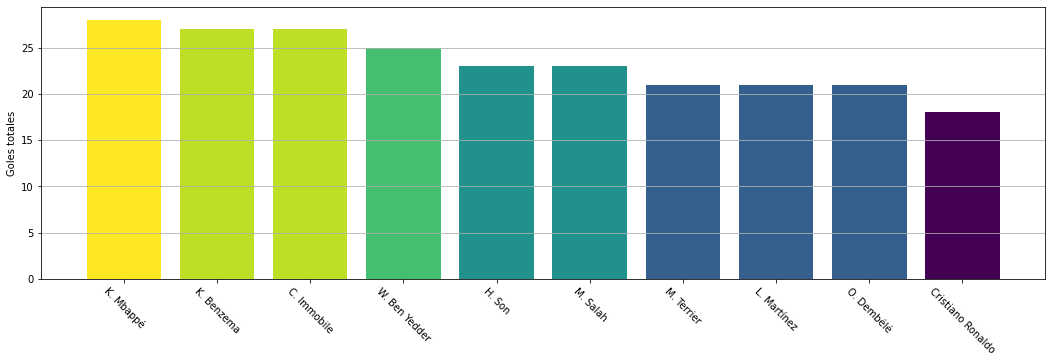

In [236]:
h1 = h1.sort_values("goles", ascending=False)[:10]
fig = plt.figure(figsize=(18,5))
# cmap = plt.get_cmap("YlGnBu")
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(h1["goles"]), max(h1["goles"]))
plt.bar(x="short_name", height="goles", data=h1, color=cmap(norm(h1["goles"])))
plt.ylabel("Goles totales")
plt.xticks(rotation=-45);
plt.grid(axis='y', zorder=0)



## H2 Niveles de 'shooting' del top 10


In [72]:
h2 = df_fifa[["id_j","short_name","shooting"]]
h2 = pd.merge(h2, df_reales[["id_j","goles"]],how="inner", on="id_j",) # !!!

In [77]:
h2 = h2.sort_values("goles",ascending=False)[:10]

### Opc1

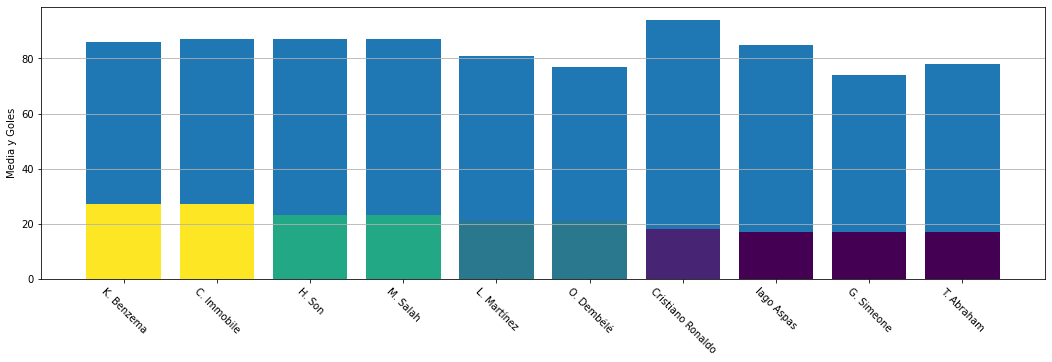

In [231]:
fig = plt.figure(figsize=(18,5))
plt.bar(x="short_name", height="shooting",data=h2)


cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(h2["goles"]), max(h2["goles"]))
plt.bar(x="short_name", height="goles", data=h2, color=cmap(norm(h2["goles"])))
plt.ylabel("Media y Goles")
plt.xticks(rotation=-45)
plt.grid(axis='y', zorder=0);

### Opc2

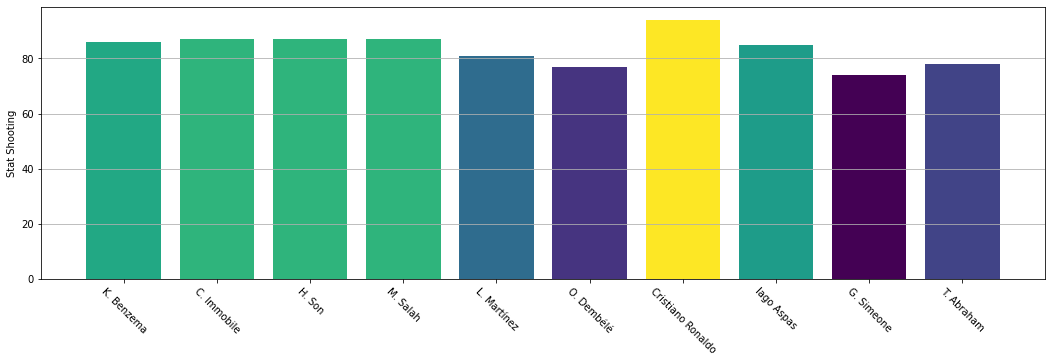

In [232]:
fig = plt.figure(figsize=(18,5))
plt.bar(x="short_name", height="shooting",data=h2)


cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(h2["shooting"]), max(h2["shooting"]))
plt.bar(x="short_name", height="shooting", data=h2, color=cmap(norm(h2["shooting"])))
plt.ylabel("Stat Shooting")
plt.xticks(rotation=-45)
plt.grid(axis='y', zorder=0);

## H3 Relación entre Shooting vs Goles reales

In [ ]:
h3 = h2
h3

### Comparación de Goles y Habilidades de Disparo top 10 goleadores

In [335]:
h3 = h3.sort_values(by="shooting",ascending=False)
fig = px.scatter(h3, x="goles",y="shooting", color="goles", size="shooting", hover_data=["short_name","shooting","goles"],title="Relación stat de shooting y los 10 goleadores")

fig.update_layout(
    title={
        'text': "Relación de Goles reales y Habilidades de Disparo",
        'font': {'size': 24},  # Tamaño de la fuente
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclar el título al centro
    }
)

fig.show()

### Relación goles reales y habilidades de disparo general de todos los goleadores

In [337]:
h3_2 = df_fifa[["id_j","short_name","shooting"]]
h3_2 = pd.merge(h3_2, df_reales[["id_j","goles"]],how="inner", on="id_j",) # !!!
h3_2=h3_2.sort_values("goles",ascending=False)
fig = px.scatter(h3_2, x="shooting",y="goles", size="goles", color_continuous_scale=px.colors.sequential.Viridis, color="goles",hover_data=["short_name","shooting","goles"])
fig.show()

## H4 Está relacionado las habilidades de pase con las asistencias reales?
id_j, nombre, passing, asistencias


In [339]:
df_fifa.head()
h4 = df_fifa[["id_j","short_name","passing"]]
h4 = pd.merge(h4, df_reales[["id_j","asistencias"]],how="left", on="id_j",) # !!!